In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


LEITURA E ANÁLISE EXPLORÁTORIA DOS DADOS

In [2]:
dados = pd.read_csv('/content/estoque.csv', sep=';')
dados.head()

,id_loja,estoque,data
0,1,167,02/01/23
1,1,160,03/01/23
2,1,184,04/01/23
3,1,164,05/01/23
4,1,188,06/01/23


In [3]:
# Tipos de dados das colunas
dados.dtypes

id_loja     int64
estoque     int64
data       object
dtype: object

In [4]:
# Conversão de data para data
dados['data'] = pd.to_datetime(dados['data'])

<ipython-input-4-ba91b581ea5b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados['data'] = pd.to_datetime(dados['data'])


In [5]:
dados.dtypes

id_loja             int64
estoque             int64
data       datetime64[ns]
dtype: object

In [6]:
# Describe para vizualizar frequencias e medidas

dados.describe()

,id_loja,estoque,data
count,174.000000,174.000000,174
mean,2.000000,251.758621,2023-03-31 21:55:51.724137984
min,1.000000,75.000000,2023-01-02 00:00:00
25%,1.000000,92.000000,2023-01-26 00:00:00
50%,2.000000,181.500000,2023-02-19 12:00:00
75%,3.000000,484.000000,2023-05-02 00:00:00
max,3.000000,500.000000,2023-12-02 00:00:00
std,0.818853,171.722653,NaN


In [7]:
dados.groupby(['id_loja']).agg({'estoque': [np.mean, np.min, np.max, np.std], 'data':[np.min, np.max]})

estoque                           data           
               mean  min  max       std        min        max
id_loja                                                      
1        179.965517  155  196  9.689867 2023-01-02 2023-12-02
2         87.568966   75  101  6.229843 2023-01-02 2023-12-02
3        487.741379  474  500  5.223296 2023-01-02 2023-12-02

In [8]:
num_lojas = dados.nunique()
num_lojas

id_loja     3
estoque    76
data       58
dtype: int64

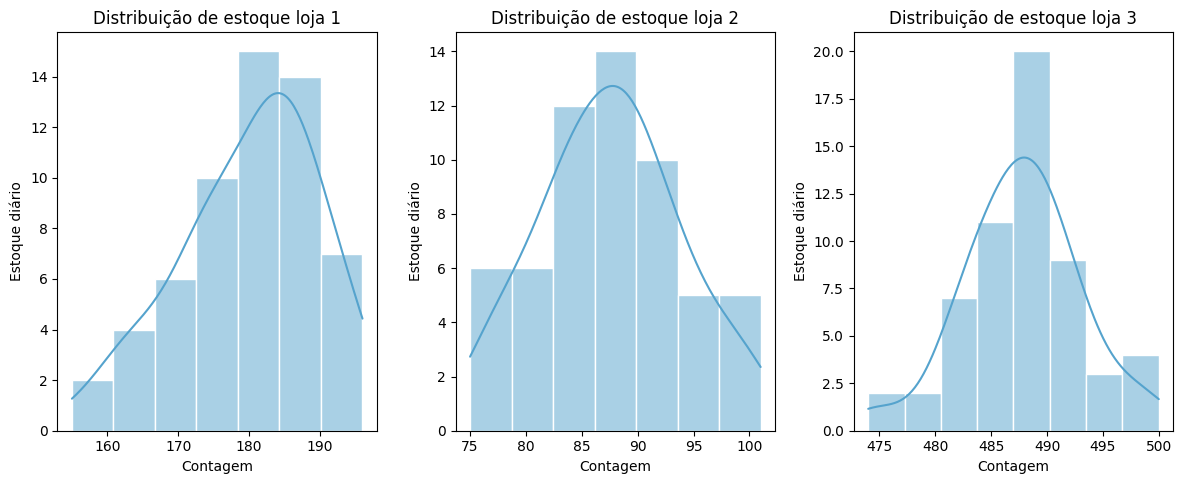

In [9]:
#paleta de cores
sns.set_palette('icefire')

n_l = dados.id_loja.nunique()
fig, ax= plt.subplots(nrows=1, ncols=n_l, figsize=[12,5])
i = 0
for loja in dados.id_loja.unique():

  sns.set(style='darkgrid')
  sns.histplot(dados[dados.id_loja == loja]['estoque'], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição de estoque loja {}'.format(loja))
  ax[i].set_ylabel('Estoque diário')
  ax[i].set_xlabel('Contagem')

  i = i + 1

plt.tight_layout()
plt.show()



# Calcular qual seria a amostra necessária para estimarmos a média do estoque de cada uma das lojas

Para calcular a amostra necessária para compararmos a média do estoque de duas lojas vamos precisar da formula da margem de erro para médias em que o desvio padrao é desconhecido, vamos verificar antes o tamanho da amostra que temos para decidir qual formula utilizar

In [12]:
# ultilizar aproximação de sigma = amplitude/4
#loja 1
#sigma

sig = (dados[dados.id_loja == 1]['estoque'].max() - dados[dados.id_loja == 1]['estoque'].min())/4

from scipy.stats import norm

a = 0.05
z = norm.ppf(1-a/2)

#sigma linha = *o - desvio padrão estimado
#z = norm.ppf(1-a/2)
#n = ((z*sigma_linha)/me)**2

#margem, me 2%
me = 0.02
n = round(((z*sig)/me)**2,0)
print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia")

me = 0.1 ### para margem de erro de 10%
n = round(((z*sig)/me)**2,0)
print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia")







O tamanho da amostra será de 1008983.0 para margem de erro de 2% e 5% de significancia
O tamanho da amostra será de 40359.0 para margem de erro de 10% e 5% de significancia


In [13]:
# Calculo de todas as lojas

for loja in dados.id_loja.unique():
  sigma = (dados[dados.id_loja == loja]['estoque'].max() - dados[dados.id_loja == loja]['estoque'].min())/4

  ### n = ((z*sigma_linha)/me)**2

  ### margem 2% , me = 2%
  me = 0.02
  n = round(((z*sigma)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia para a loja "+str(loja))
  ##margem 10% , me = 10%
  me = 0.1
  n = round(((z*sigma)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia para a loja "+str(loja))


O tamanho da amostra será de 1008983.0 para margem de erro de 2% e 5% de significancia para a loja 1
O tamanho da amostra será de 40359.0 para margem de erro de 10% e 5% de significancia para a loja 1
O tamanho da amostra será de 405754.0 para margem de erro de 2% e 5% de significancia para a loja 2
O tamanho da amostra será de 16230.0 para margem de erro de 10% e 5% de significancia para a loja 2
O tamanho da amostra será de 405754.0 para margem de erro de 2% e 5% de significancia para a loja 3
O tamanho da amostra será de 16230.0 para margem de erro de 10% e 5% de significancia para a loja 3
